## Step 1: Imports and Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt #for visualizing dataset
import seaborn as sns
plt.style.use('ggplot')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [55]:
#Read the dataset

df = pd.read_csv('/kaggle/input/h-and-m-personalized-fashion-recommendations/articles.csv')

In [5]:
df_transaction_train.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


## Step 2: Data Understanding


In [ ]:
#Shape of Dataframe
df.shape

The dataset has 105542 rows and 25 Columns

In [ ]:
#To see the first couple of rows of the dataset
df.head(10)

* By default, it shows us the first 5 columns of the dataset, but if we want to see more, we can put the desired number in the bracket

In [ ]:
#Due to the higher number of columns in the dataset, it does not show us all the columns in the "HEAD" function. To see all of them we can load this function:
pd.set_option('display.max_columns', 200)
df.head()

In [ ]:
#To see all the columns name
df.columns

## Articles
* **article_id** : A unique identifier of every article.
* **product_code, prod_name** : A unique identifier of every product and its name
* **product_type, product_type_name** : The group of product_code and its name
* **graphical_appearance_no, graphical_appearance_name** : The group of graphics and its name
* **colour_group_code, colour_group_name** : The group of color and its name
* **perceived_colour_value_id, perceived_colour_value_name, perceived_colour_master_id, perceived_colour_master_name** : The added color info
* **department_no, department_name**: A unique identifier of every dep and its name
* **index_code, index_name**: A unique identifier of every index and its name
* **index_group_no, index_group_name**: A group of indices and its name
* **section_no, section_name**: A unique identifier of every section and its name
* **garment_group_no, garment_group_name**: A unique identifier of every garment and its name
* **detail_desc**: Details

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create a figure with subplots
fig = make_subplots(rows=1, cols=1)

# Create a time series plot
trace = go.Scatter(x=df_transaction_train['t_dat'], y=df_transaction_train['price'], mode='lines+markers', name='Price')
fig.add_trace(trace)

# Get the minimum and maximum dates from the transaction table
min_date = df_transaction_train['t_dat'].min()
max_date = df_transaction_train['t_dat'].max()

# Define step options for the slider
step_options = [
    dict(method='relayout', args=['xaxis', {'range': [min_date, max_date]}], label='All'),
    dict(method='relayout', args=['xaxis', {'range': [max_date - pd.DateOffset(years=1), max_date]}], label='Yearly'),
    dict(method='relayout', args=['xaxis', {'range': [max_date - pd.DateOffset(months=1), max_date]}], label='Monthly'),
    dict(method='relayout', args=['xaxis', {'range': [max_date - pd.DateOffset(weeks=1), max_date]}], label='Weekly'),
    dict(method='relayout', args=['xaxis', {'range': [max_date - pd.DateOffset(days=1), max_date]}], label='Daily')
]

# Create a slider for adjusting the date range
date_slider = dict(
    active=2,  # Index of the default step (Monthly)
    currentvalue=dict(prefix="Time Interval: "),
    steps=[dict(label=step['label'], method=step['method'], args=step['args']) for step in step_options]
)

# Update layout to include the slider
fig.update_layout(
    sliders=[date_slider],
    title="Sales Over Time with Date Range Slider",
    xaxis_title="Date",
    yaxis_title="Sales"
)

# Show the interactive plot
fig.show()


# ARTICLE EDA

In [ ]:
df.describe()

:

1. **article_id:** 
   - The `article_id` is a unique identifier for each article.
   - The minimum value is 108,775, and the maximum value is 959,461.

2. **product_code:**
   - The `product_code` is another unique identifier for each product.
   - The minimum value is 108,775, and the maximum value is 959,461.

3. **product_type_no:**
   - The `product_type_no` represents the product type, with a mean value of approximately 234.86.
   - The minimum value is -1, which might indicate missing or undefined values.
   - The maximum value is 762.

4. **graphical_appearance_no:**
   - The `graphical_appearance_no` represents the appearance of graphics associated with the articles.
   - The mean value is around 1,009,515, and the minimum value is -1, which might indicate missing or undefined values.

5. **colour_group_code:**
   - The `colour_group_code` represents the code for color groups.
   - The mean value is approximately 32.23, with a minimum value of -1 (possibly missing/undefined) and a maximum of 93.

6. **perceived_colour_value_id:**
   - This column seems to represent perceived color values.
   - The mean value is approximately 3.21, with a minimum value of -1 (possibly missing/undefined) and a maximum of 7.

7. **perceived_colour_master_id:**
   - This column also relates to perceived color values.
   - The mean value is around 7.81, with a minimum value of -1 (possibly missing/undefined) and a maximum of 20.

8. **department_no:**
   - The `department_no` is associated with different departments.
   - The mean value is approximately 4532.78, with a minimum of 1201 and a maximum of 9989.

9. **index_group_no:**
   - This column represents the index group number.
   - The mean value is around 3.17, with a minimum value of 1 and a maximum of 26.

10. **section_no:**
    - The `section_no` is related to different sections.
    - The mean value is approximately 42.66, with a minimum of 2 and a maximum of 97.

11. **garment_group_no:**
    - The `garment_group_no` is associated with garment groups.
    - The mean value is around 1010.44, with a minimum value of 1001 and a maximum of 1025.

This summary provides an overview of the distribution of various columns in the `df` 

In [ ]:
df['article_id'].nunique()

In [ ]:
df['product_code'].nunique()

In [ ]:
z = df.groupby('product_code')['article_id'].count().reset_index()

In [ ]:
df[df['product_code']==108775]

# making unique product combination

In [ ]:
# Concatenate the relevant columns to create a unique product identifier
df['unique_product'] = df.apply(
    lambda row: (
        row['product_code'],
        row['product_type_no'],
        row['graphical_appearance_no'],
        row['colour_group_code'],
        row['perceived_colour_value_id'],
        row['perceived_colour_master_id']
    ),
    axis=1
)

# Find the total number of unique products
total_unique_products = df['unique_product'].nunique()

# List unique combinations of product attributes
unique_product_combinations = df['unique_product'].unique()

# Display the results
print("Total Unique Products:", total_unique_products)





# Total Unique Products: 98872

1. Now check how much sales they have made

In [ ]:
# Merge the sales data with the product data based on 'article_id'
merged_data = df.merge(df_transaction_train, on='article_id', how='inner')

# Calculate total sales per unique product
total_sales_per_product = merged_data.groupby('unique_product')['price'].sum()

# Display the total sales for each unique product
print("Total Sales for Unique Products:")
print(total_sales_per_product)


In [ ]:
TSPP = pd.DataFrame(total_sales_per_product).reset_index()

In [ ]:
TSPP.head()

In [ ]:
import plotly.express as px

# Assuming you have the total sales per unique product in a DataFrame
# Replace 'total_sales_per_product_df' with the actual DataFrame containing your data

# Sort the DataFrame by total sales in descending order and select the top 10 products
top_10_products = TSPP.sort_values('price', ascending=False).head(10)
last_10_products = TSPP.sort_values('price', ascending=True).head(10)

top_10_products


In [ ]:
last_10_products

(706016, 272, 1010016, 9, 4, 5)

In [ ]:
df[df['unique_product']==(344625, 76, 1010017, 71, 1, 2)]

# Findings
1. Jade HW Skinny Denim TRS top unique sellig product in H&M  total_sale of-->1786.561831


2. ELLEN Sunhat is the lowest unique selling product in H&M total_sale of--> 0.000424


In [ ]:
df.columns

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt



# 1. Pie Chart for Product Types (using Plotly)
fig = px.pie(df, names='product_type_name', title='Distribution of Product Types', color_discrete_sequence=px.colors.qualitative.Set3)

fig.show()

# 2. Bar Chart for Colour Groups (using Plotly)
colour_group_counts = df['colour_group_name'].value_counts()
fig = px.bar(colour_group_counts, x=colour_group_counts.index, y=colour_group_counts.values, labels={'x': 'Colour Group', 'y': 'Count'}, title='Colour Group Distribution', color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

# 3. Scatter Plot for Colour and Department (using Matplotlib)
plt.figure(figsize=(10, 6))
plt.scatter(df['colour_group_code'], df['department_no'], alpha=0.5, c='green')
plt.xlabel('Colour Group Code')
plt.ylabel('Department Number')
plt.title('Scatter Plot of Colour Group vs. Department')
plt.show()

# 4. Interactive Heatmap (using Plotly)
fig = px.imshow(df.corr(), title='Correlation Heatmap', color_continuous_scale='Viridis')
fig.show()

# 5. Interactive Histogram for Article IDs (using Plotly)
fig = px.histogram(df, x='article_id', title='Distribution of Article IDs', color_discrete_sequence=['blue'])
fig.show()

# 6. Interactive 3D Scatter Plot (using Plotly)
fig = px.scatter_3d(df, x='product_type_no', y='colour_group_code', z='department_no', title='3D Scatter Plot', color='perceived_colour_value_id')
fig.show()


In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x='product_type_no',
    y='colour_group_code',
    z='perceived_colour_value_id',
    color='department_name',  # Color by department_name
    size='garment_group_no'  # Size by garment_group_no
)

# Customize the appearance
fig.update_layout(
    scene=dict(
        xaxis_title='Product Type No',
        yaxis_title='Colour Group Code',
        zaxis_title='Perceived Colour Value ID'
    )
)

fig.show()


The 3D scatter plot can provide various insights depending on the context and the actual data. Here are some potential insights you can gain from the graph I provided:

1. **Distribution of Products by Type, Color, and Perceived Color Value:**
   - You can observe the distribution of products in a 3D space, where the X-axis represents the product type, the Y-axis represents the color group code, and the Z-axis represents the perceived color value. This allows you to see how products are spread across these three dimensions.

2. **Color Department Representation:**
   - The color of data points in the graph is based on the 'department_name'. You can identify which departments are associated with different regions of the 3D space. For example, if certain departments cluster in a particular area of the plot, it suggests that those departments share similar product characteristics in terms of product type, color, and perceived color value.

3. **Size Significance:**
   - The size of data points is determined by 'garment_group_no'. Larger markers may indicate higher values in this category, and you can assess if there's any pattern related to the size of the garments within the 3D space.

4. **Outliers and Clusters:**
   - Identify any outliers or clusters within the 3D space. Outliers may represent products that are unique or don't fit the typical patterns observed in the dataset. Clusters can indicate groups of products that share similar attributes.

5. **Correlations and Relationships:**
   - By examining the distribution of data points, you can explore potential correlations and relationships between the three chosen dimensions. For example, you might notice that certain color groups are associated with specific product types and perceived color values.

6. **Data Quality:**
   - If you notice data points concentrated at certain extreme values or near -1 (which might indicate missing or undefined values), it could indicate data quality issues in those dimensions.



In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x='product_type_no',
    y='colour_group_code',
    z='perceived_colour_value_id',
    color='department_name',  # Color by department_name
    size='garment_group_no'  # Size by garment_group_no
)

# Customize the appearance
fig.update_layout(
    scene=dict(
        xaxis_title='Product Type No',
        yaxis_title='Colour Group Code',
        zaxis_title='Perceived Colour Value ID'
    )
)

fig.show()


In [ ]:
fig = px.scatter_3d(
    df,
    x='colour_group_code',
    y='perceived_colour_master_id',
    z='department_no',
    color='department_name',
    size='garment_group_no'
)
fig.update_layout(
    scene=dict(
        xaxis_title='Colour Group Code',
        yaxis_title='Perceived Colour Master ID',
        zaxis_title='Department No'
    )
)
fig.show()


In [8]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss

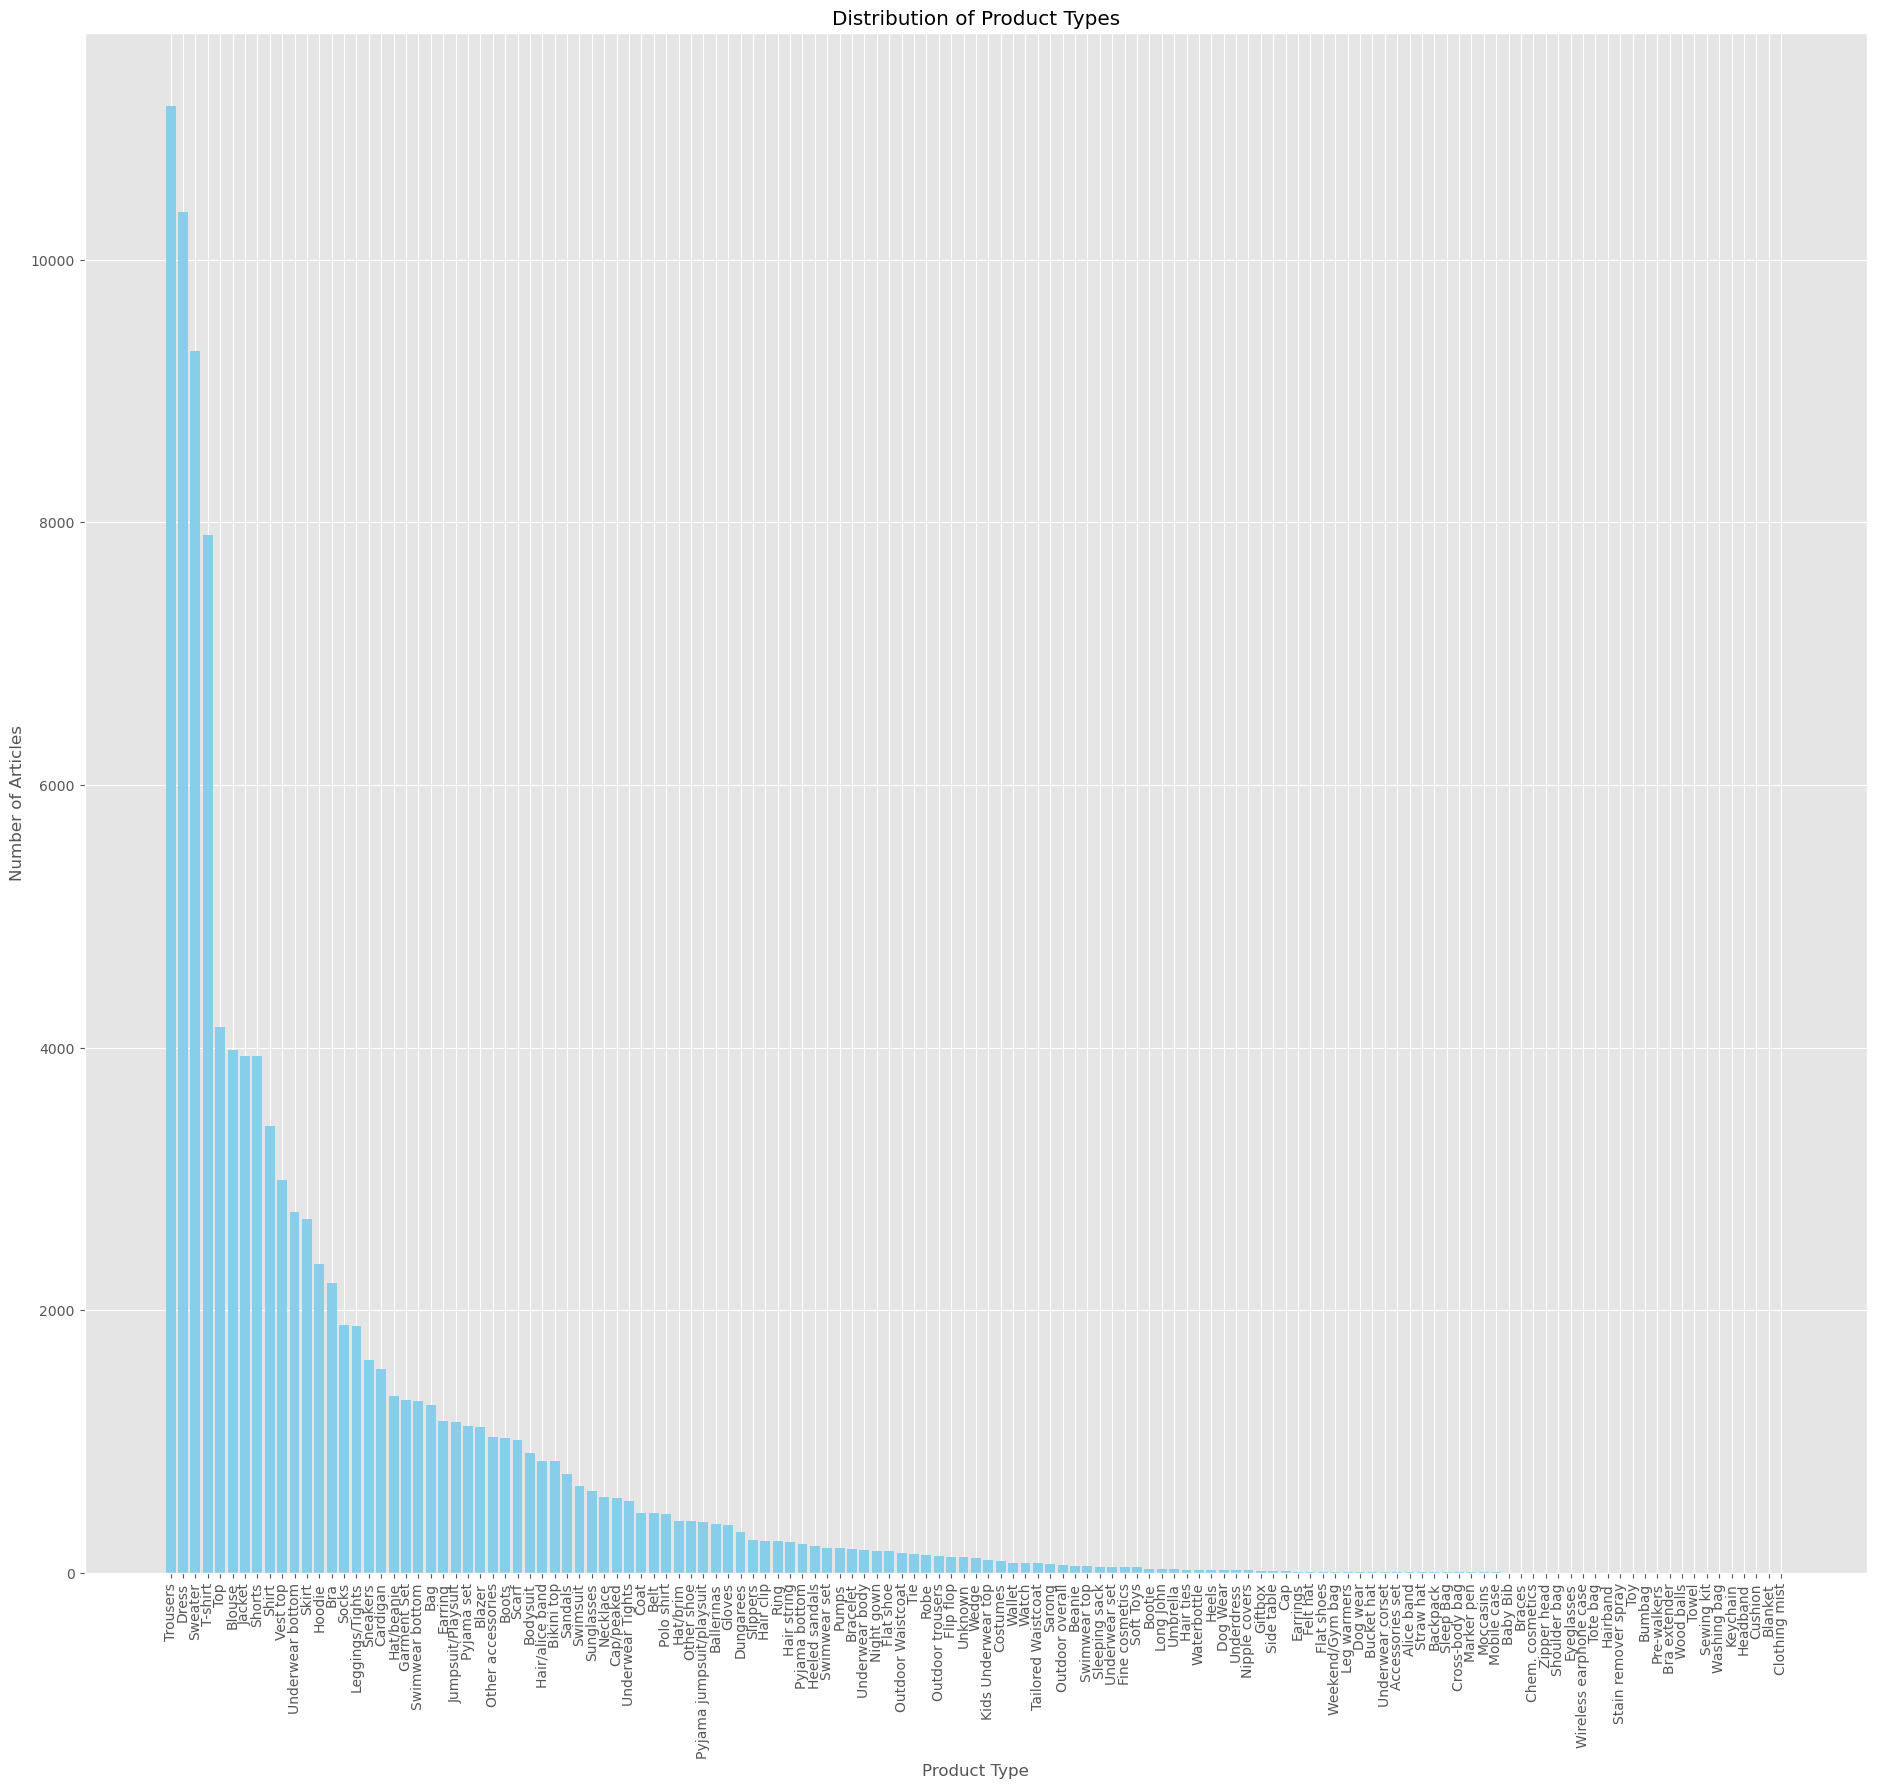

In [38]:
import pandas as pd
import matplotlib.pyplot as plt


df_articles = df[['article_id','product_type_name']]

# Step 1: Data Aggregation
product_type_counts = df_articles['product_type_name'].value_counts()

# Step 2: Visualization
plt.figure(figsize=(23, 20))
plt.bar(product_type_counts.index, product_type_counts.values, color='skyblue')
plt.xlabel('Product Type')
plt.ylabel('Number of Articles')
plt.title('Distribution of Product Types')
plt.xticks(rotation=90)
plt.show()


In [39]:
# Step 1: Data Aggregation
product_type_counts = df_articles['product_type_name'].value_counts().reset_index()
product_type_counts.columns = ['Product Type', 'Count']

# Step 2: Visualization using Plotly
fig = px.bar(product_type_counts, x='Product Type', y='Count', title='Distribution of Product Types')
fig.update_traces(marker_color='skyblue')
fig.update_layout(xaxis_title='Product Type', yaxis_title='Number of Articles')

fig.show()


In [40]:
#3
import pandas as pd
import plotly.express as px



df_articles = df[['article_id','colour_group_name','perceived_colour_value_name']]

# Step 1: Data Aggregation
color_group_counts = df_articles['colour_group_name'].value_counts().reset_index()
color_group_counts.columns = ['Color Group', 'Count']

perceived_value_counts = df_articles['perceived_colour_value_name'].value_counts().reset_index()
perceived_value_counts.columns = ['Perceived Value', 'Count']

# Step 2: Visualization using Plotly
fig = px.bar(color_group_counts, x='Color Group', y='Count', title='Distribution of Color Groups')
fig.update_traces(marker_color='skyblue')
fig.update_layout(xaxis_title='Color Group', yaxis_title='Number of Articles')

fig.show()

fig2 = px.bar(perceived_value_counts, x='Perceived Value', y='Count', title='Distribution of Perceived Values')
fig2.update_traces(marker_color='lightcoral')
fig2.update_layout(xaxis_title='Perceived Value', yaxis_title='Number of Articles')

fig2.show()


In [41]:
#10 
import pandas as pd
import plotly.express as px


df_articles = df[['article_id','department_name','index_name']]

# Step 1: Data Aggregation
department_counts = df_articles['department_name'].value_counts().reset_index()
department_counts.columns = ['Department', 'Count']

category_counts = df_articles['index_name'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Step 2: Visualization using Plotly
fig = px.bar(department_counts, x='Department', y='Count', title='Number of Articles in Each Department')
fig.update_traces(marker_color='skyblue')
fig.update_layout(xaxis_title='Department', yaxis_title='Number of Articles')

fig.show()

fig2 = px.bar(category_counts, x='Category', y='Count', title='Number of Articles in Each Category')
fig2.update_traces(marker_color='lightcoral')
fig2.update_layout(xaxis_title='Category', yaxis_title='Number of Articles')

fig2.show()
